## OUTLIER DETECTION DAY 1/OUTLIER DETECTION PART 1 EXERCISE ANSWERS ##
#### Exercise 1 ####
#### Task 1
##### Import the required packages
##### Set the working directory to data directory
##### Print the working directory and the plot directory
#### Result:


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import kneed
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True) #<- suppress scientific notations
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)


/Users/swaroopnc/Downloads/SkillAnamoly2025
/Users/swaroopnc/Downloads/SkillAnamoly2025/data


#### Task 2
##### Read in `seismic-hazards.csv` to a new dataframe `hazard`.
##### Read the documentation to understand the variables https://archive.ics.uci.edu/ml/datasets/seismic-bumps#
##### Explore the dataset by printing its head, info and shape.
#### Result:


In [2]:
hazard = pd.read_csv(str(data_dir) + '/seismic-hazard.csv')
hazard.head()
hazard.shape
hazard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2584 non-null   int64 
 1   seismic         2584 non-null   object
 2   seismoacoustic  2584 non-null   object
 3   shift           2584 non-null   object
 4   genergy         2584 non-null   int64 
 5   gpuls           2584 non-null   int64 
 6   gdenergy        2584 non-null   int64 
 7   gdpuls          2584 non-null   int64 
 8   ghazard         2584 non-null   object
 9   nbumps          2584 non-null   int64 
 10  nbumps2         2584 non-null   int64 
 11  nbumps3         2584 non-null   int64 
 12  nbumps4         2584 non-null   int64 
 13  nbumps5         2584 non-null   int64 
 14  nbumps6         2584 non-null   int64 
 15  nbumps7         2584 non-null   int64 
 16  nbumps89        2584 non-null   int64 
 17  energy          2584 non-null   int64 
 18  maxenerg

#### Task 3
##### The target variable in this dataset is `class`.
##### Print the value counts of the target and also check the percentage of the outlier class.
##### Plot the distribution of the target.
#### Result:


class
0    0.934211
1    0.065789
Name: count, dtype: float64


<Axes: xlabel='class'>

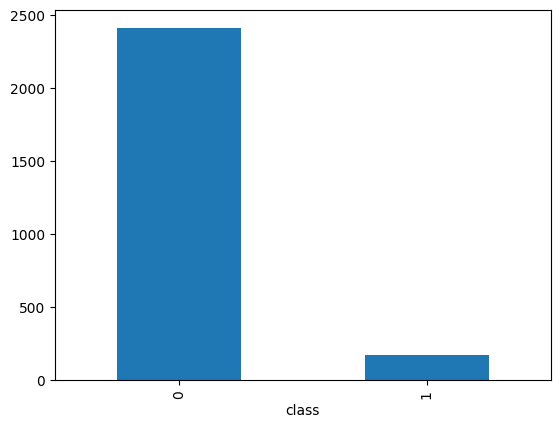

In [3]:
hazard['class'].value_counts()
print(hazard['class'].value_counts()/ len(hazard))
hazard['class'].value_counts().plot(kind = 'bar')


#### Task 4
##### Drop all the non-numerical columns and target variable `class`. Save this subset as `hazard_dbscan` and print its head.
##### Check how many NAs are in each column and impute them with mean, if required.
#### Result:


In [4]:
hazard_dbscan = hazard.drop(['seismic','seismoacoustic','shift','ghazard','class','id'], axis = 1)
hazard_dbscan.head()
hazard_dbscan.isnull().sum()


genergy      0
gpuls        0
gdenergy     0
gdpuls       0
nbumps       0
nbumps2      0
nbumps3      0
nbumps4      0
nbumps5      0
nbumps6      0
nbumps7      0
nbumps89     0
energy       0
maxenergy    0
dtype: int64

#### Task 5
##### Scale `hazard_dbscan` using the `StandardScaler` function.
##### Name the scaled dataframe as `hazard_dbscan_scaled`. 
##### Convert `hazard_dbscan_scaled` back to a Pandas dataframe and make sure that the column names are the same as before.
#### Result:


In [5]:
scaler = StandardScaler()
hazard_dbscan_scaled = scaler.fit_transform(hazard_dbscan)
hazard_dbscan_scaled = pd.DataFrame(hazard_dbscan_scaled, columns=hazard_dbscan.columns)
hazard_dbscan_scaled.head()


genergy     gpuls  gdenergy    gdpuls    nbumps   nbumps2   nbumps3  \
0 -0.327561 -0.872073 -1.050711 -1.211459 -0.629984 -0.502253 -0.510423   
1 -0.329568 -0.898738 -1.025805 -1.322299  0.102965 -0.502253  0.789019   
2 -0.358675 -0.904071 -1.162786 -1.306465 -0.629984 -0.502253 -0.510423   
3 -0.268038 -0.653424 -0.440526  0.561974  0.102965 -0.502253  0.789019   
4 -0.338645 -0.856075 -0.938636 -0.894775 -0.629984 -0.502253 -0.510423   

    nbumps4   nbumps5  nbumps6  nbumps7  nbumps89    energy  maxenergy  
0 -0.242736 -0.068305      0.0      0.0       0.0 -0.243327  -0.221087  
1 -0.242736 -0.068305      0.0      0.0       0.0 -0.145512  -0.117747  
2 -0.242736 -0.068305      0.0      0.0       0.0 -0.243327  -0.221087  
3 -0.242736 -0.068305      0.0      0.0       0.0 -0.096605  -0.066078  
4 -0.242736 -0.068305      0.0      0.0       0.0 -0.243327  -0.221087

#### Task 6
##### Run the DBSCAN model on `ex_db`.
##### For now, we set ϵ to have a radius of 0.4.
##### We set MinPts (min_samples in the function) to 5.
##### What do those two parameters mean?
##### Check how many clusters we have.
##### How many outliers do you have?
#### Result:


In [6]:
# DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples = 5)
clusters = dbscan.fit_predict(hazard_dbscan_scaled)
#It means that we want 5 samples in a neighborhood with a radius of 0.4.
unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)
#We have 12 clusters and 838 outliers.


[[  -1  838]
 [   0 1302]
 [   1  167]
 [   2  180]
 [   3    5]
 [   4    5]
 [   5    5]
 [   6    8]
 [   7   38]
 [   8    8]
 [   9    9]
 [  10    5]
 [  11    7]
 [  12    7]]


#### Exercise 2 ####
#### Task 1
##### Idenify the optimal eps using NearestNeighbors().
##### Set number of neighbors to be `10` and fit the model to `hazard_dbscan_scaled`
##### Calculate the distances of every point with it's 10 closest neighbors
#### Result:


In [7]:
nn_model = NearestNeighbors(n_neighbors=10)
nbrs = nn_model.fit(hazard_dbscan_scaled)
distances, indices = nbrs.kneighbors(hazard_dbscan_scaled)


#### Task 2
##### Calculate average distance for each point with its 10 neighbors and sort the distances
##### Use KneeLocator to programmatically find the optimal `eps` distance from the elbow plot
#### Result:


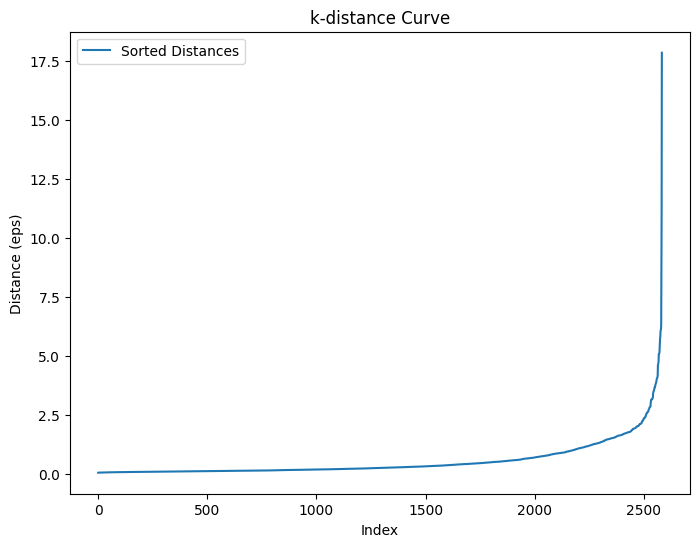

Optimal Epsilon (eps): 3.150757304409727


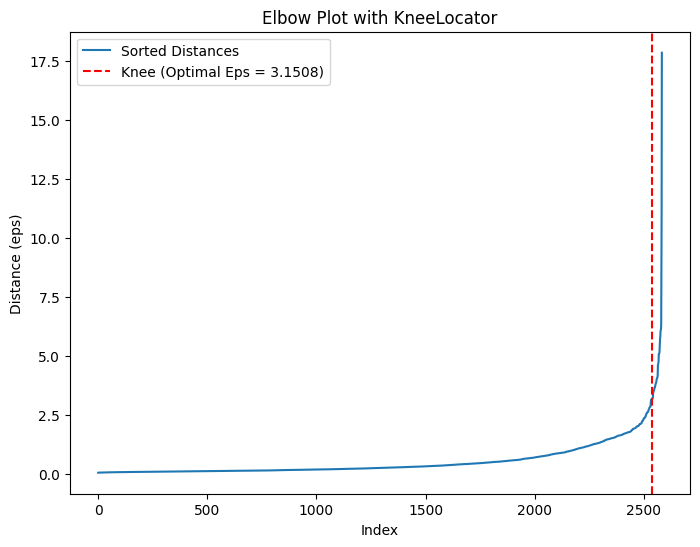

In [8]:
distances = np.mean(distances,axis=1)
distances = np.sort(distances, axis=0)
# Plot the sorted distances to visualize the k-distance curve
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Sorted Distances")
plt.xlabel('Index')
plt.ylabel('Distance (eps)')
plt.title('k-distance Curve')
plt.legend()
plt.show()
# Use KneeLocator to identify the optimal eps programmatically
from kneed import KneeLocator
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee_locator.knee]
print(f"Optimal Epsilon (eps): {optimal_eps}")
# Visualize the elbow plot with the knee point highlighted
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Sorted Distances")
plt.axvline(x=knee_locator.knee, color='r', linestyle='--', label=f"Knee (Optimal Eps = {optimal_eps:.4f})")
plt.xlabel('Index')
plt.ylabel('Distance (eps)')
plt.title('Elbow Plot with KneeLocator')
plt.legend()
plt.show()
#Optimal eps distance is 3.15


#### Task 3
##### Run a new DBSCAN analysis with the optimized parameters.
##### Check the number of clusters.
##### Assign the cluster results to `hazard_dbscan`. Replace the anomaly cluster points with `1` and rest cluster points to `0`
#### Result:


In [9]:
dbscan = DBSCAN(eps=3.15, min_samples = 10)
optimized_clusters = dbscan.fit_predict(hazard_dbscan_scaled)
# Check the number of clusters
unique, counts = np.unique(optimized_clusters, return_counts=True)
print(np.asarray((unique, counts)).T)
hazard_dbscan['cluster'] = optimized_clusters
hazard_dbscan.loc[hazard_dbscan['cluster'] >= 0,'cluster'] = 0
hazard_dbscan.loc[hazard_dbscan['cluster'] == -1,'cluster'] = 1


[[  -1   49]
 [   0 2404]
 [   1  131]]


#### Task 4
##### Visualize the anomalies detected using a scatterplot
##### Plot a scatterplot with `energy` and `maxenergy`
##### Plot a scatterplot with `genergy` and `maxenergy`
#### Result:


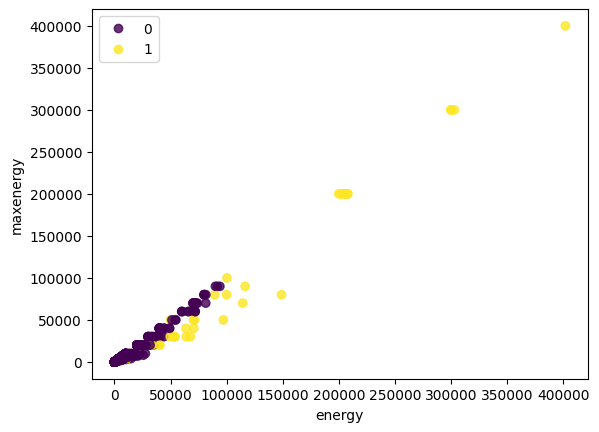

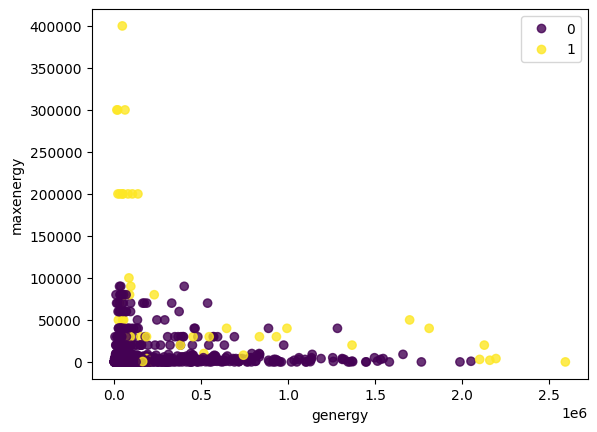

In [10]:
fig, ax = plt.subplots()
sc = ax.scatter(hazard_dbscan['energy'], hazard_dbscan['maxenergy'], c = hazard_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('energy')
plt.ylabel('maxenergy')
plt.show()
fig, ax = plt.subplots()
sc = ax.scatter(hazard_dbscan['genergy'], hazard_dbscan['maxenergy'], c = hazard_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('genergy')
plt.ylabel('maxenergy')
plt.show()


## OUTLIER DETECTION DAY 1/OUTLIER DETECTION PART 2 EXERCISE ANSWERS ##
#### Exercise 3 ####
#### Task 1
##### Import the required packages
##### Set the working directory to data directory
##### Print the working directory and the plot directory
#### Result:


In [11]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True) #<- suppress scientific notations
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)


/Users/swaroopnc/Downloads/SkillAnamoly2025
/Users/swaroopnc/Downloads/SkillAnamoly2025/data


#### Task 2
##### Load the `PJM_Load_hourly.csv` dataset and print the head. Save as `pjm_load`.
##### Convert the `Datatime` variable from type `object` to `datetime`. Check its datatype after type-conversion
##### Filter the data to include values post-year 2000
##### Visualize the time series data using a line plot
#### Result:


In [12]:
pjm_load = pd.read_csv(str(data_dir) + "/PJM_Load_hourly.csv")
pjm_load.head()
pjm_load['Datetime'] = pd.to_datetime(pjm_load['Datetime'])
pjm_load.info()
pjm_load = pjm_load[pjm_load['Datetime'] > '2000-01-01 00:00:00']
pjm_load.plot(x='Datetime', y='PJM_Load_MW', figsize=(17,6))
plt.xlabel('Date time')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each hour')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     32896 non-null  datetime64[ns]
 1   PJM_Load_MW  32896 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 514.1 KB


#### Task 3
##### Scale the variable `PJM_Load_MW` and save the dataset as `pjm_load`.
##### Find the optimal eps value using the k-distance approach and KneeLocator.
##### Set the number of neighbors in NearestNeighbors() to be 5.
##### Plot the k-distance curve with the knee point highlighted.
#### Result:


Optimal Epsilon (eps): 0.0054709438365375005


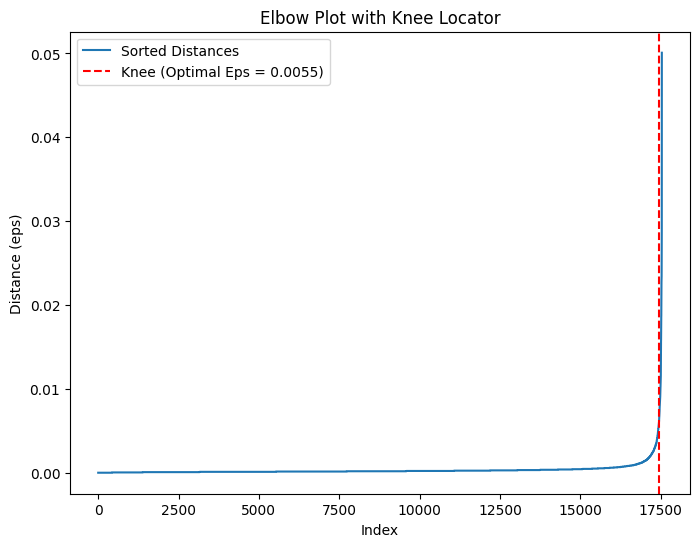

In [13]:
from kneed import KneeLocator
# Step 1: Scale the variable
scaler = StandardScaler()
ex_pjm_energy_scaled = scaler.fit_transform(pd.DataFrame(pjm_load['PJM_Load_MW']))
pd.DataFrame(ex_pjm_energy_scaled).describe()
# Step 2: Fit NearestNeighbors and calculate k-distances
nn_model = NearestNeighbors(n_neighbors=5)
nbrs = nn_model.fit(ex_pjm_energy_scaled)
distances, indices = nbrs.kneighbors(ex_pjm_energy_scaled)
# Step 3: Sort the k-distances
distances = np.mean(distances, axis=1)
distances = np.sort(distances, axis=0)
# Step 4: Use KneeLocator to find the optimal epsilon
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee_locator.knee]
print(f"Optimal Epsilon (eps): {optimal_eps}")
# Step 5: Plot the k-distance curve with the knee point highlighted
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Sorted Distances")
plt.axvline(x=knee_locator.knee, color="r", linestyle="--", label=f"Knee (Optimal Eps = {optimal_eps:.4f})")
plt.xlabel('Index')
plt.ylabel('Distance (eps)')
plt.title('Elbow Plot with Knee Locator')
plt.legend()
plt.show()
#Optimal Epsilon (eps): 0.0055


#### Task 4
##### Apply the DBSCAN algorithm on `ex_pjm_energy_scaled` with `optimal eps` and `min_samples:5`.
##### Visualize the anomalies.
#### Result:


In [14]:
ex_dbscan_energy = DBSCAN(eps = 0.0055, metric='euclidean',min_samples=5, n_jobs = -1)
# pjm_time_series['anomaly'] = dbscan_energy.fit_predict(pd.DataFrame(pjm_time_series['PJME_MW']))
pjm_load['anomaly'] = ex_dbscan_energy.fit_predict(pd.DataFrame(ex_pjm_energy_scaled))
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = pjm_load.loc[pjm_load['anomaly'] == -1, ['Datetime', 'PJM_Load_MW']] #anomaly
ax.plot(pjm_load['Datetime'], pjm_load['PJM_Load_MW'], color='blue', label = 'Normal')
ax.scatter(a['Datetime'],a['PJM_Load_MW'], color='red', label = 'Anomaly')
plt.legend()
plt.show()


#### Exercise 4 ####
#### Task 1
##### Read in `seismic-hazards.csv` to a new dataframe `hazard`.
##### Use the `hazard` dataset to prepare for decision tree modeling
##### Drop the `id` column, convert the categorical variables to dummies, and append them to the original dataframe.
##### The variables are: seismic, seismoacoustic, shift, and ghazard. Note that the values of these variables are already coded.
##### Hint: Columns can be sent listed together in pd.get_dummies()
#### Result:


In [15]:
hazard = pd.read_csv(str(data_dir) + '/seismic-hazard.csv')
hazard = hazard.drop(['id'], axis = 1)
colname = pd.get_dummies(hazard[['seismic','seismoacoustic','shift','ghazard']], drop_first = True)
hazard = pd.concat([hazard, colname], axis = 1)
hazard.drop(['seismic','seismoacoustic','shift','ghazard'], axis = 1, inplace = True)


#### Task 2
##### Separate the target as `y_ex` and other columns as `X_ex`.
##### Separate training and test data as `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex` with 70:30 partition and fit a DecisionTreeClassifier with `max_depth: 10`
##### Set random seed to 1
#### Result:


In [16]:
# Separate predictors and target.
y_ex = hazard['class']
X_ex = hazard.drop(['class'], axis = 1)
np.random.seed(1)
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.30)
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(X_train_ex, y_train_ex)


DecisionTreeClassifier(max_depth=10)

#### Task 3
##### Predict on the training and test datasets.
##### Print the testing accuracy.
##### Print the confusion matrix for training and test data.
##### Find the percentage of accurate hazards on training and test data.
#### Result:


In [17]:
dtree_y_train_pred = dtree.predict(X_train_ex)
dtree_y_test_pred = dtree.predict(X_test_ex)
dtree_accuracy_ex = metrics.accuracy_score(y_test_ex, dtree_y_test_pred)
print("Accuracy of test data:\t", dtree_accuracy_ex)
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_ex, dtree_y_train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate hazards found', 92/116)
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test_ex, dtree_y_test_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate hazards found', 8/54)


Accuracy of test data:	 0.8969072164948454
Confusion Matrix - Training Dataset
Predicted     0   1   All
True                     
0          1691   1  1692
1            24  92   116
All        1715  93  1808
Percentage of accurate hazards found 0.7931034482758621
Confusion Matrix - Testing Dataset
Predicted    0   1  All
True                   
0          688  34  722
1           46   8   54
All        734  42  776
Percentage of accurate hazards found 0.14814814814814814


#### Task 4
##### Find TPR and TNR.
##### Save the metric to a new performance dataframe with the name `performance_df_ex`.
##### Interpret the results.
#### Result:


In [18]:
tn, fp, fn, tp = confusion_matrix(y_test_ex, dtree_y_test_pred).ravel()
# Find TNR.
non_fraud_eval = tn / (tn + fp)
print(non_fraud_eval)
# Find TPR.
fraud_eval = tp / (tp + fn)
print(fraud_eval)
performance_df_ex = pd.DataFrame(columns = ['model_name', 'TPR', 'TNR'])
s = pd.Series(['DecisionTree_baseline', fraud_eval, non_fraud_eval], 
              index=['model_name', 'TPR', 'TNR'])
performance_df_ex = pd.concat([performance_df_ex, pd.DataFrame([s])], ignore_index=True)
performance_df_ex
#TNR is very high but TPR is close to 10% which is really odd


0.9529085872576177
0.14814814814814814


/var/folders/x5/rz_mr0157xb4fmgm1m22pp5r0000gn/T/ipykernel_82176/1573837637.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df_ex = pd.concat([performance_df_ex, pd.DataFrame([s])], ignore_index=True)


model_name       TPR       TNR
0  DecisionTree_baseline  0.148148  0.952909

#### Exercise 5 ####
#### Task 1
##### Set random_state as 1 and create SMOTE samples to training dataset as `X_train_new_ex` and `y_train_new_ex` to balance the classes.
##### Print the shape of the training data before resampling and after resampling.
#### Result:


In [19]:
sm = SMOTE(random_state = 2)
X_train_new_ex, y_train_new_ex = sm.fit_resample(X_train_ex, y_train_ex)
# Shape of X_train_ex.
print(X_train_ex.shape)
# Shape of X_train_new_ex.
print(X_train_new_ex.shape)


(1808, 20)
(3384, 20)


#### Task 2
##### Plot the target variable of the resampled dataset (`y_train_new_ex`)
##### How are the data points distributed?
#### Result:


<Axes: xlabel='class'>

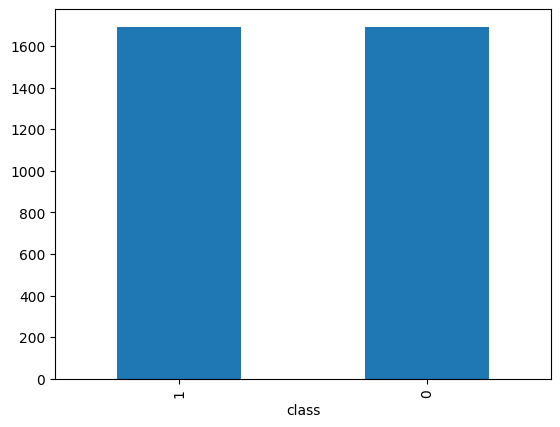

In [20]:
# Observe that data has been balanced.
pd.Series(y_train_new_ex).value_counts().plot.bar()


- The classes are balanced now after SMOTE resampling
#### Task 3
##### Fit the DecisionTree Classifer to the resampled dataset and predict on train and test data.
#### Result:


In [21]:
# Fit the model.
dtree.fit(X_train_new_ex, y_train_new_ex)
# Prediction for training data.
train_pred_sm = dtree.predict(X_train_new_ex)
# Prediction for test data.
test_pred_sm = dtree.predict(X_test_ex)
train_pred_sm = dtree.predict(X_train_new_ex)


#### Task 4
##### Print the confusion matrix for training and test data.
##### Analyze the result.
#### Result:


In [22]:
print(pd.crosstab(y_train_new_ex, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))
print(pd.crosstab(y_test_ex, test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))


Predicted     0     1   All
True                       
0          1602    90  1692
1            59  1633  1692
All        1661  1723  3384
Predicted    0    1  All
True                    
0          635   87  722
1           38   16   54
All        673  103  776


#### Task 5
##### Find the TPR and TNR and save the result.
##### Compare the result to our baseline DecisionTree model and interpret.
##### Optional: If you wish to run other classification algorithms and compare results then save the dataframe as a pickle. Make sure to give it a name differing from slides pickle.
#### Result:


In [23]:
# Find TPR and TNR and save the result.
tn, fp, fn, tp = confusion_matrix(y_test_ex, test_pred_sm).ravel()
non_hazard_eval = tn / (tn + fp)
print(non_hazard_eval)
hazard_eval = tp / (tp + fn)
print(hazard_eval)
s = pd.Series(['SMOTE', hazard_eval, non_hazard_eval], 
              index = ['model_name', 'TPR', 'TNR'])
performance_df_ex = pd.concat([performance_df_ex, pd.DataFrame([s])], ignore_index=True)
performance_df_ex
#Performing SMOTE has shown improvement in predicting hazard as we see an increase in TPR
pickle.dump(performance_df_ex, open(str(data_dir) + "/ex_performance_anomalies.sav","wb" ))


0.8795013850415513
0.2962962962962963
